## Задание 1

*На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.*

In [17]:
import pandas as pd  
import numpy as np
from scipy import stats
  
df = pd.read_excel('data.xls')

In [18]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [20]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [21]:
duplicates = df.duplicated('USER_ID').sum()
print(duplicates)

3676


In [22]:
df.drop_duplicates('USER_ID', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6324 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       6324 non-null   int64  
 1   VARIANT_NAME  6324 non-null   object 
 2   REVENUE       6324 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 197.6+ KB


In [23]:
df.VARIANT_NAME.value_counts()

variant    3192
control    3132
Name: VARIANT_NAME, dtype: int64

In [24]:
df.query('VARIANT_NAME == "variant"').describe()

,USER_ID,REVENUE
count,3192.000000,3192.000000
mean,4976.005639,0.072694
std,2879.795529,1.256534
min,3.000000,0.000000
25%,2476.500000,0.000000
50%,4956.500000,0.000000
75%,7412.750000,0.000000
max,10000.000000,57.460000


In [25]:
df.query('VARIANT_NAME == "control"').describe()

,USER_ID,REVENUE
count,3132.000000,3132.000000
mean,4992.371967,0.126986
std,2908.251167,3.584689
min,2.000000,0.000000
25%,2462.250000,0.000000
50%,5005.500000,0.000000
75%,7584.250000,0.000000
max,9998.000000,196.010000


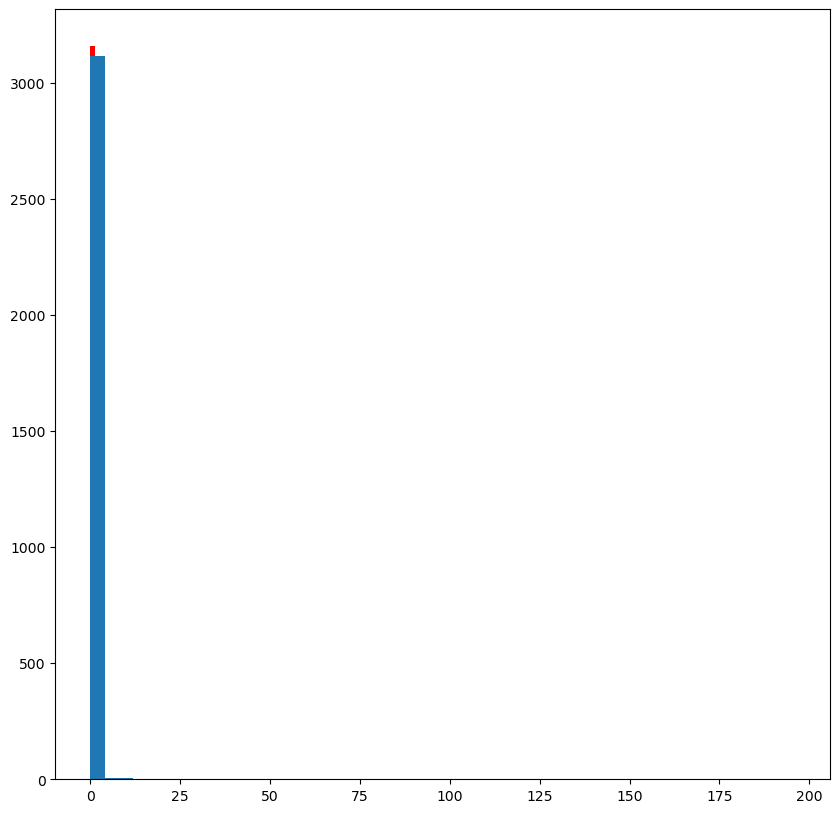

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
revenue_variant = df['REVENUE'][df['VARIANT_NAME'] == 'variant']
revenue_control =df['REVENUE'][df['VARIANT_NAME'] == 'control']


plt.hist(revenue_variant, color='r', bins=50)
plt.hist(revenue_control,  bins=50)


plt.show()

In [27]:
statistic, p_value = stats.mannwhitneyu(revenue_variant, revenue_control)

print(statistic, p_value)
alpha = 0.05
if p_value < alpha:
    print("Разница в доходах между вариантами является статистически значимой.")
else:
    print("Разница в доходах между вариантами не является статистически значимой.")

4990967.5 0.6049438033840282
Разница в доходах между вариантами не является статистически значимой.


***Значит, изменения, которые были сделаны в ходе эксперимента, не принесли результата. Рекомендации менеджеру - не запускать в работу изменения.****

---